# Author : Tanmay Rathod

Data Science & Business Analytics Intern

Task 5 - Exploratory Data Analysis -Terrorism

GRIP- The Spark Foundation

This is an EDA performed on IPL dataset. In this analysis, I am trying to find out the most successful teams, players and factors contributing win or loss of a team. Suggest teams of players a company should endorse for its products.

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

## Exploring Matches Data

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Heatmap showing null values

<AxesSubplot:>

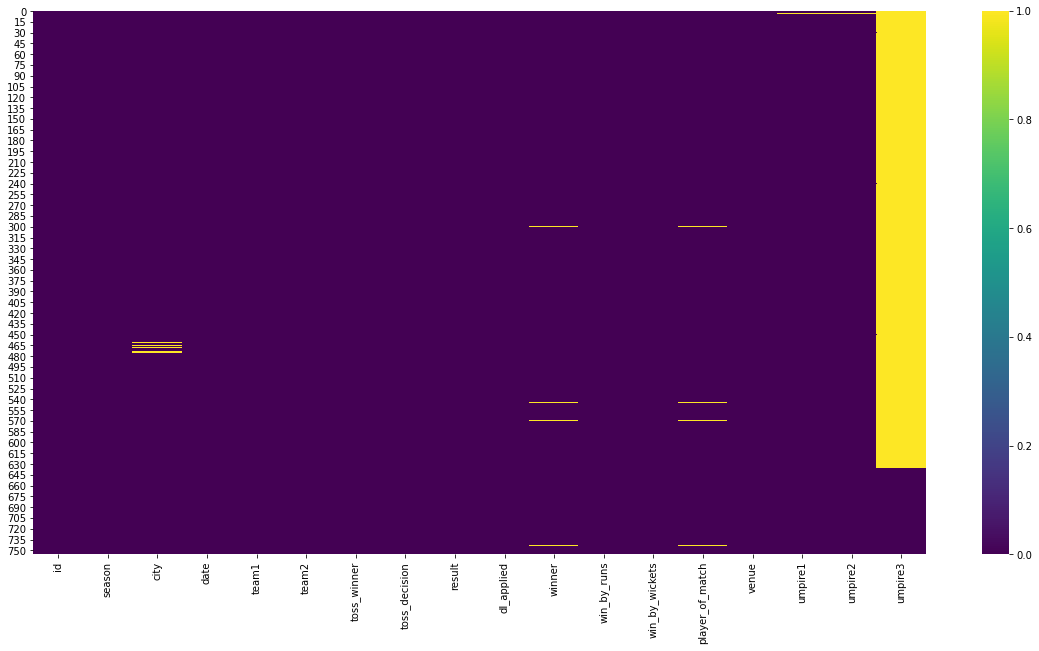

In [7]:
plt.figure(figsize= (20,10))
sns.heatmap(matches.isnull(),cbar = True, cmap ='viridis')

In [8]:
#Checking Missing Values of City column
matches[matches.city.isnull()][['venue','city']]

,venue,city
461,Dubai International Cricket Stadium,NaN
462,Dubai International Cricket Stadium,NaN
466,Dubai International Cricket Stadium,NaN
468,Dubai International Cricket Stadium,NaN
469,Dubai International Cricket Stadium,NaN
474,Dubai International Cricket Stadium,NaN
476,Dubai International Cricket Stadium,NaN


In [9]:
#Filling NA values in City column
matches.city=matches.city.fillna('Dubai')

In [10]:
#Checking Shape of Matches dataset
matches.shape

(756, 18)

In [11]:
#Total np. of matches in the dataset
matches['id'].max()

11415

In [12]:
#Seasons in the dataset
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [13]:
#Total no. of seasons
len(matches.season.unique())

12

In [14]:
#maximum run made by team
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [15]:
#Team whic won by maximum runs
matches.iloc[matches['win_by_runs'].idxmax]['winner']

'Mumbai Indians'

In [16]:
#Team which won by maximum wickets
matches.iloc[matches['win_by_wickets'].idxmax]['winner']

'Kolkata Knight Riders'

In [17]:
city_venue =matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

## Data Visualisation

### Barplot of Seasons which had maximum no. of matches

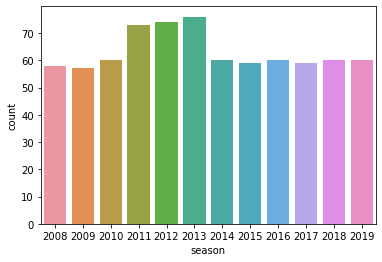

In [18]:
sns.countplot(x='season',data= matches)
plt.show()

### Barplot showing number of times a team won 

<AxesSubplot:xlabel='winner'>

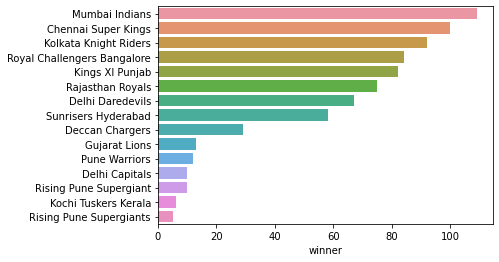

In [19]:
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')

### Barplot of Top player of the match winner

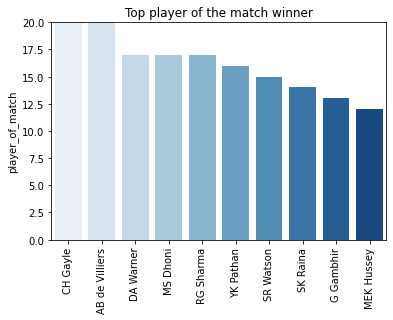

In [20]:
top_player =matches.player_of_match.value_counts()[:10]
fig,ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel('Count')
ax.set_title('Top player of the match winner')
top_player.plot.bar()
sns.barplot(x =top_player.index, y =top_player, orient='v', palette='Blues')
plt.show()

### Barplot of Number of teams participated each season

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

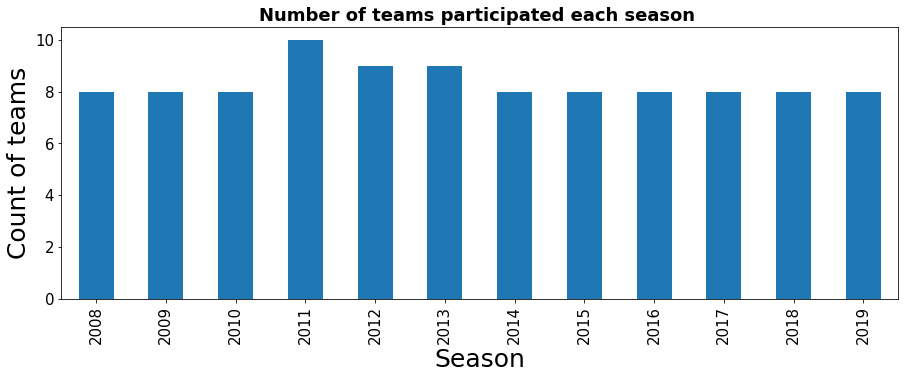

In [21]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

### Barplot of venue which hosted most number of matches

Text(0.5, 0, 'Frequency')

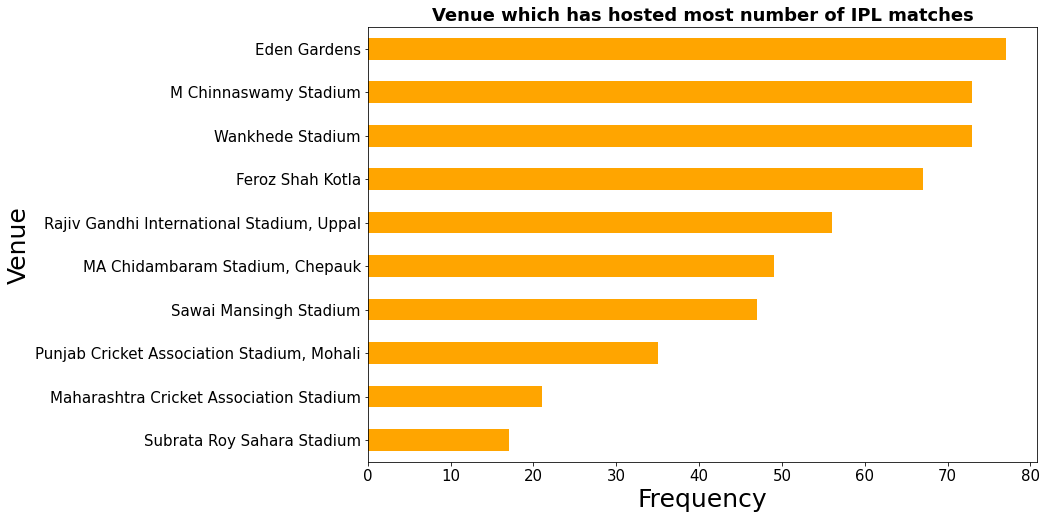

In [22]:
matches.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(12,8), fontsize=15, color='orange')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 25)
plt.xlabel("Frequency", size = 25)


### Team that has dominated IPL

In [23]:
# creating a dataframe with season and winner columns
winning_teams = matches[['season','winner']]

# dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(0, 1, 'Chennai Super Kings'),
  Text(0, 2, 'Kolkata Knight Riders'),
  Text(0, 3, 'Deccan Chargers'),
  Text(0, 4, 'Sunrisers Hyderabad'),
  Text(0, 5, 'Rajasthan Royals')])

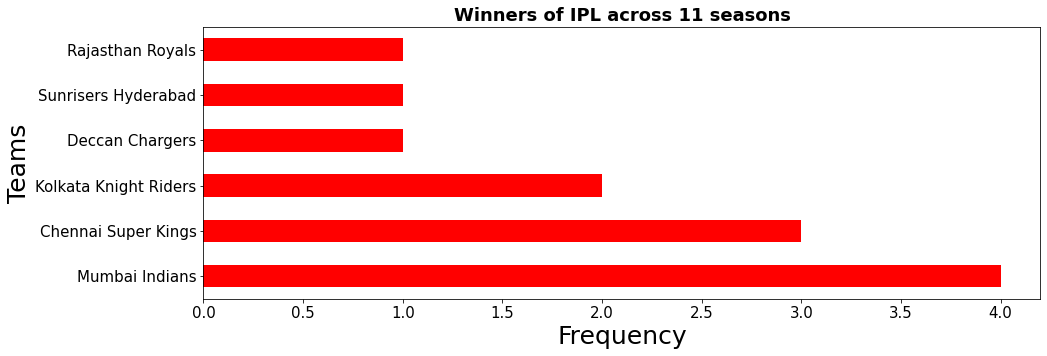

In [24]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'red')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

### Pie Chart of Teams bat first or second after winning toss

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

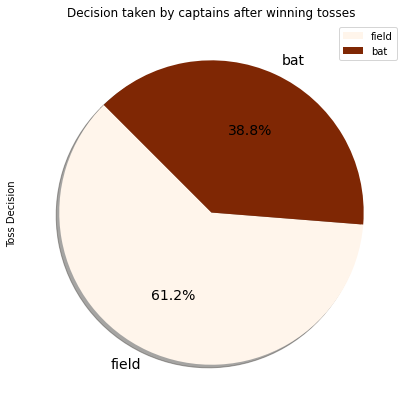

In [25]:
matches['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,7), shadow=True, startangle=135, legend=True, cmap='Oranges')

plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

### Effects of Toss Decision on Match Results

Text(0, 0.5, 'Frequency')

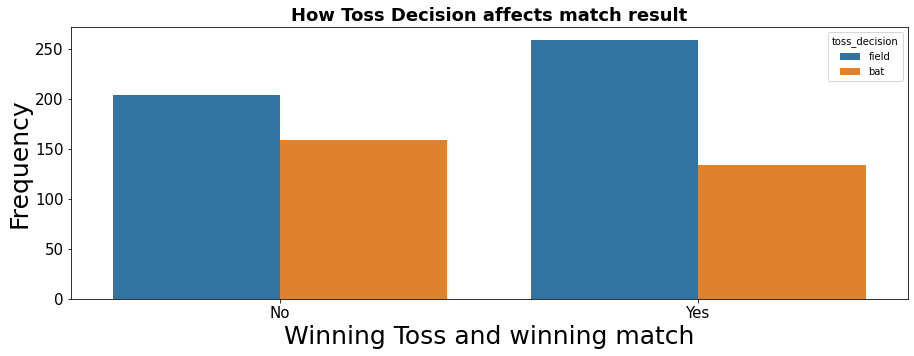

In [26]:
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=matches, hue = 'toss_decision')
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

### Teams Decision after winning toss

Text(0, 0.5, 'Count')

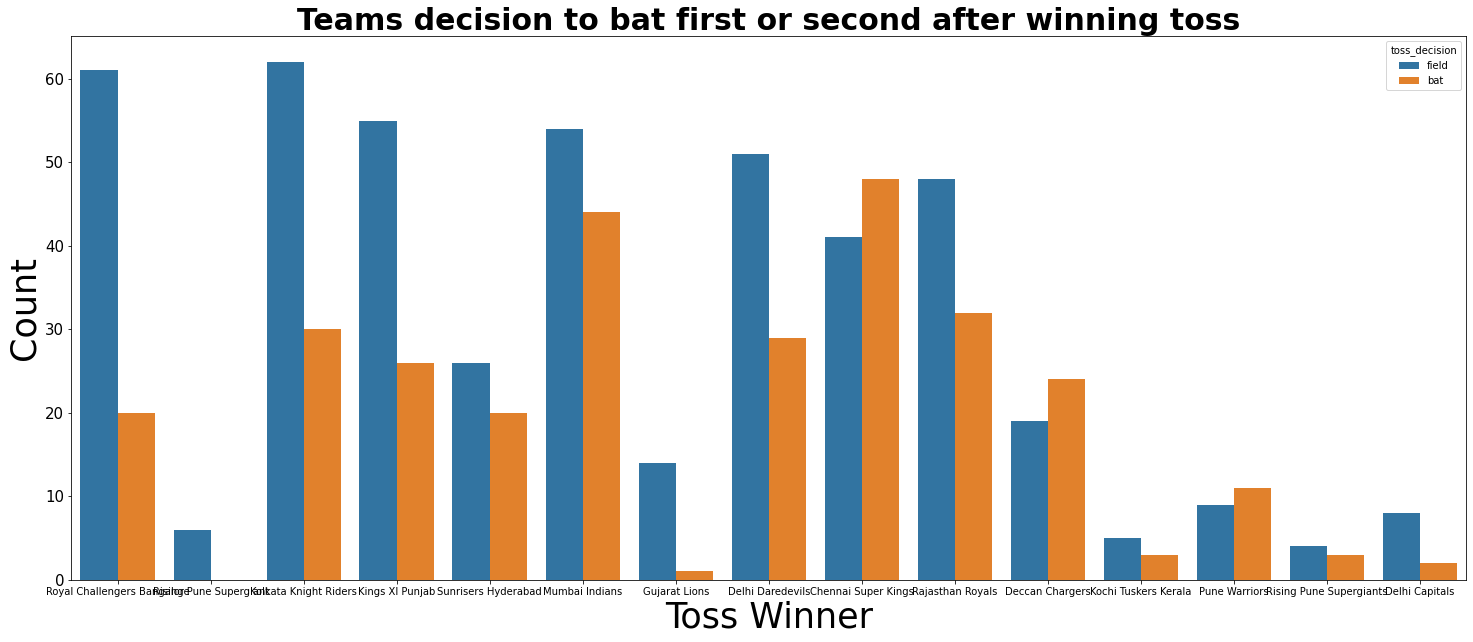

In [27]:
plt.figure(figsize = (25,10))
sns.countplot('toss_winner', data = matches, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 10)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)

### Barplot of players performance that results in Winning of team

Text(0.5, 0, 'Players')

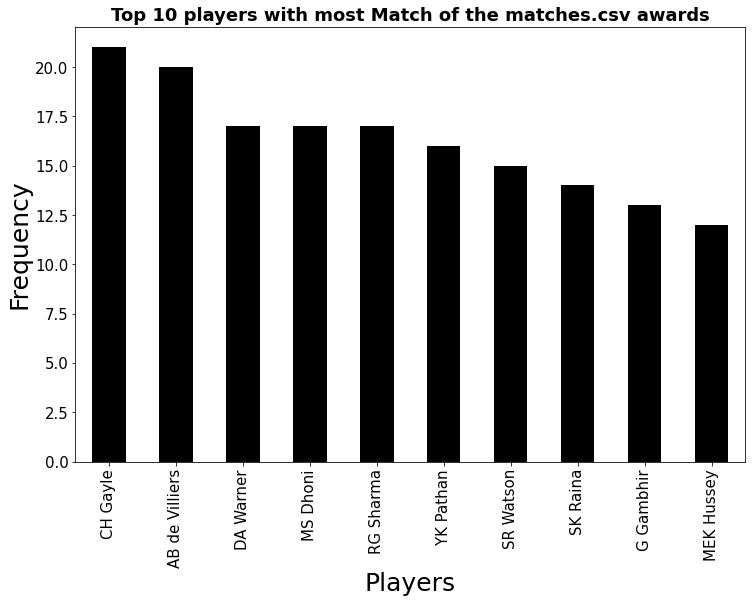

In [41]:
MoM= matches['player_of_match'].value_counts()
MoM.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='black')
plt.title("Top 10 players with most Match of the matches.csv awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)

### Barplot showing whether fielding first advantegous across venues

Text(0, 0.5, 'Venue')

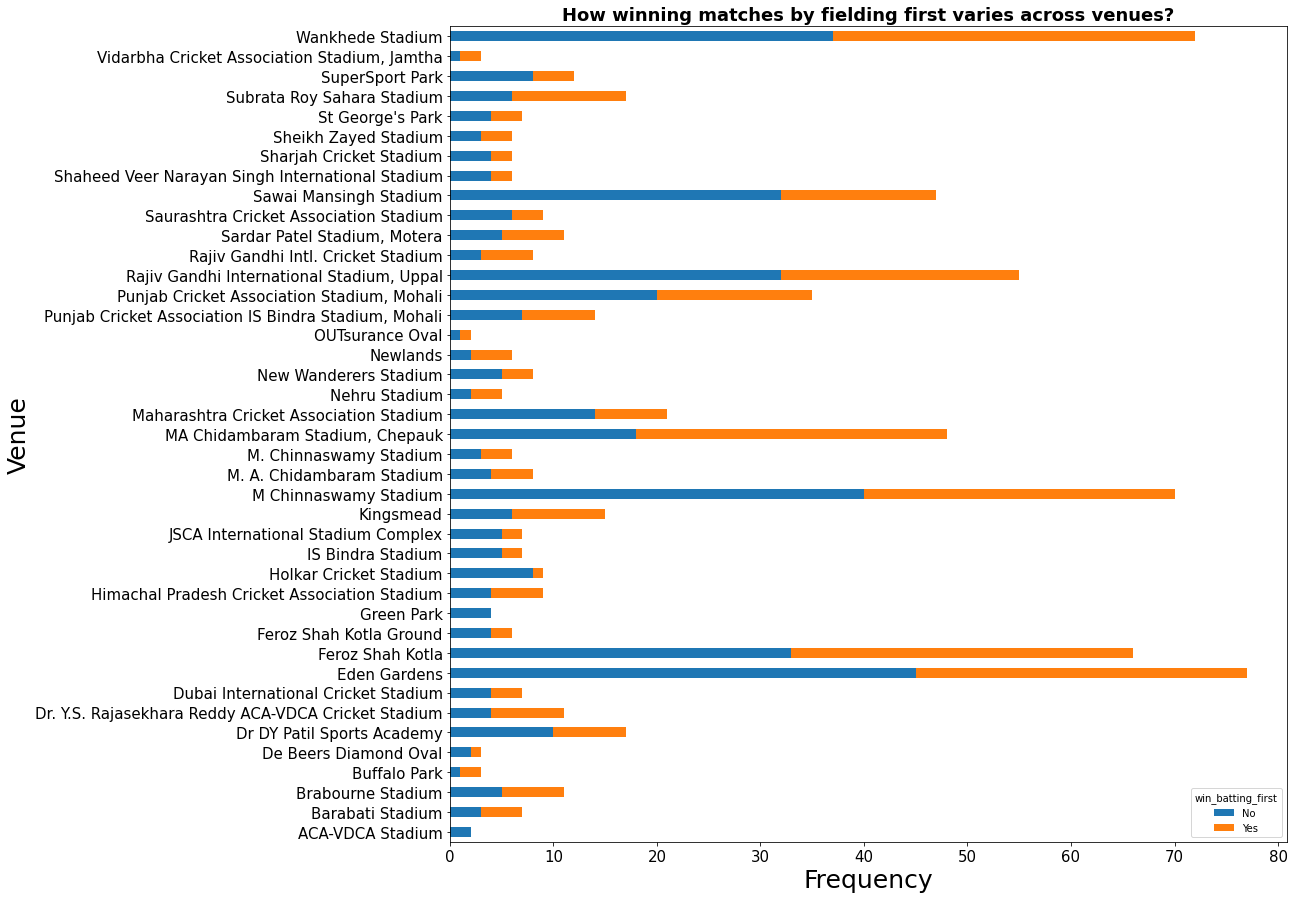

In [29]:
new_matches = matches[matches['result'] == 'normal']   #taking all those matches where result is normal and creating a new dataframe
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'barh', stacked = True,
                                                                               figsize=(15,15))
plt.title("How winning matches by fielding first varies across venues?", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Frequency", fontsize = 25)
plt.ylabel("Venue", fontsize = 25)

### Barplot showing whether batting second advantageous or not

Text(0, 0.5, 'Count')

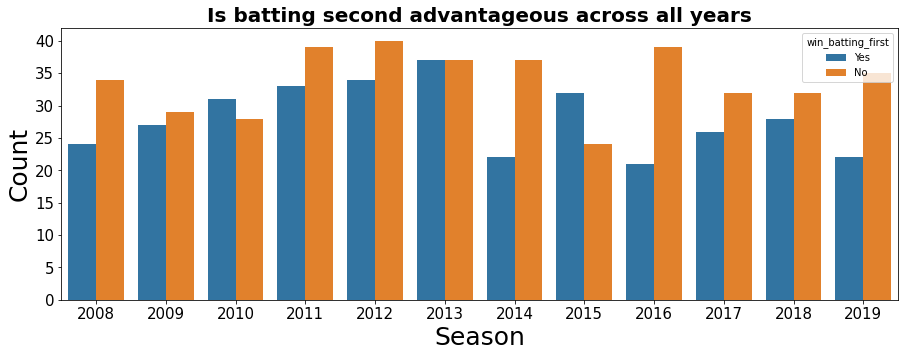

In [30]:
plt.figure(figsize = (15,5))
sns.countplot('season', data = new_matches, hue = 'win_batting_first')
plt.title("Is batting second advantageous across all years", fontsize=20,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Season", fontsize = 25)
plt.ylabel("Count", fontsize = 25)

## Exploring Deliveries Dataset

In [31]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [32]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [33]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [34]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [35]:
deliveries.shape

(179078, 21)

<AxesSubplot:>

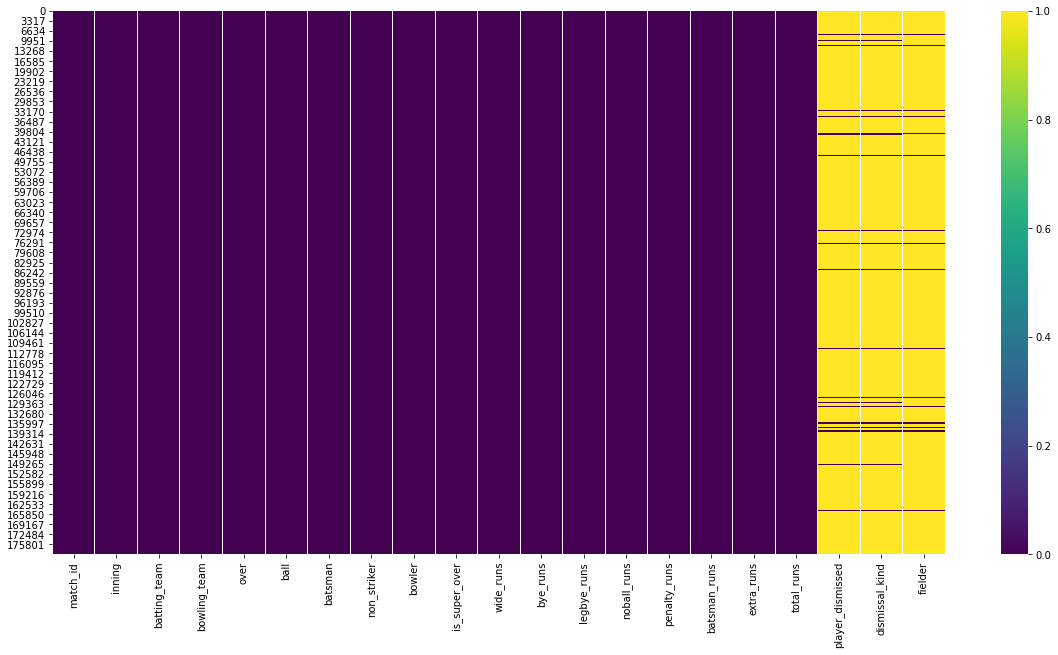

In [36]:
plt.figure(figsize =(20,10))
sns.heatmap(deliveries.isnull(),cbar =True,cmap = 'viridis')

In [37]:
#Dropping Umpire3 from the dataset
matches.drop('umpire3',axis= 'columns',inplace =True)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,toss_win_game_win
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,No
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Yes
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Yes
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Yes
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,Yes


## Data Visualisation

### Barplot showing who bowled maximum balls

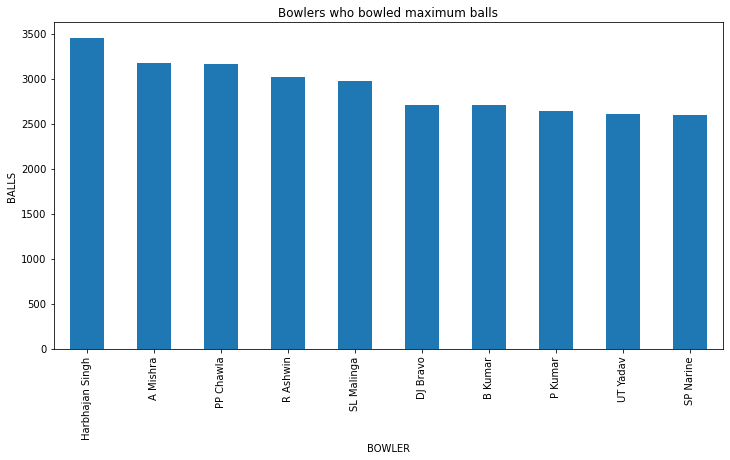

,Harbhajan Singh,A Mishra,PP Chawla,R Ashwin,SL Malinga,DJ Bravo,B Kumar,P Kumar,UT Yadav,SP Narine
bowler,3451,3172,3157,3016,2974,2711,2707,2637,2605,2600


In [38]:
balls = deliveries['bowler'].value_counts()[:10]
balls.plot(kind='bar', title='Bowlers who bowled maximum balls', figsize=(12,6))
plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()
balls = pd.DataFrame(balls)
balls.T

## Barplot showing maximum number of Dot Balls

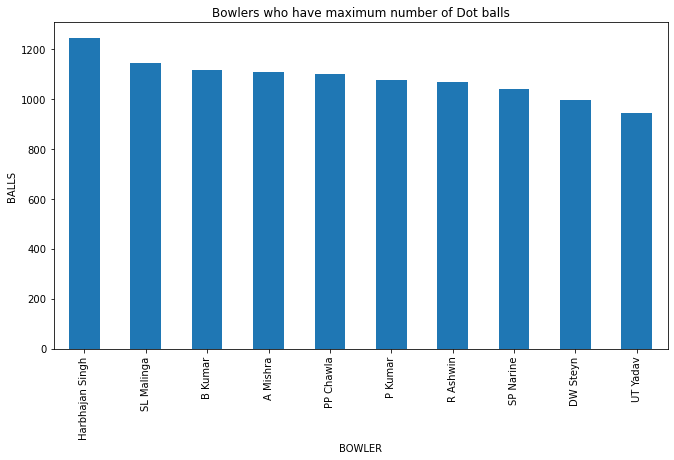

,Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla,P Kumar,R Ashwin,SP Narine,DW Steyn,UT Yadav
bowler,1244,1144,1116,1108,1100,1075,1067,1038,996,942


In [39]:
dot_ball = deliveries[deliveries['total_runs']==0]
dot_ball = dot_ball['bowler'].value_counts()[:10]
dot_ball.plot(kind='bar', figsize=(11,6), title='Bowlers who have maximum number of Dot balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

dot_ball = pd.DataFrame(dot_ball)
dot_ball.T

## Barplot showing who bowled maximum number of extra balls

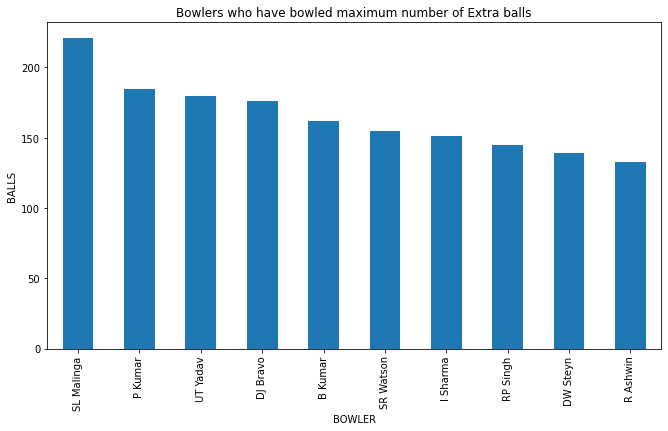

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [40]:
extra = deliveries[deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

extra = pd.DataFrame(extra)
extra.T

# Conclusions:

1. Win toss and field first so as to win more matches irrespective of venues
2. Top batsmans are Chris Gayle, AB de Villars and after that M.S. Dhoni, R.G. Sharma.
2. Tahir can be an equally good option as he has been the most impressive spinner in last few seasons woth a good strike rate and healthy average.
4. Mumbai Indians have dominated IPL over the years. After Mumbai Indians Chennai Super Kings are in the second position for dominating IPL matches.
5. Most of the teams which have won the toss have opted for fielding first. Fielding first have helped them in winning the matches. So it seems a good option to choose fielding first.
    